In [1]:
# Load MNIST
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

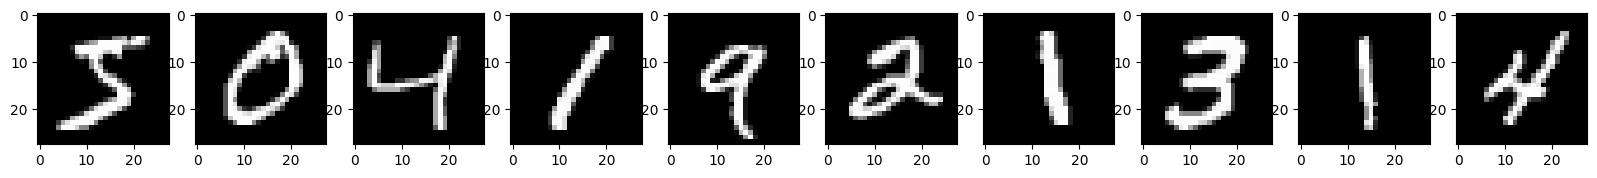

In [2]:
# Visualize the first 10 images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')

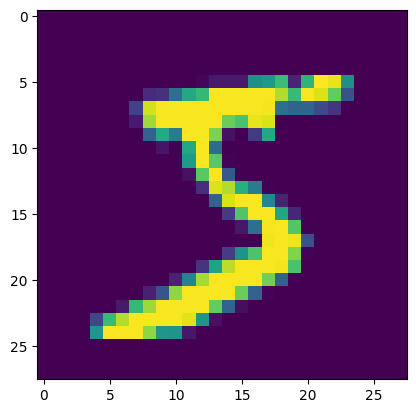

In [3]:
plt.imshow(X_train[0]) # Original Image

In [4]:
y_train[0] # Label

5

In [5]:
# Create Adam Optimizer
from tensorflow.keras.optimizers import Adam
optimizer_1 = Adam(learning_rate=0.001)

In [6]:
# Base Model (Model 1)
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Define a simple neural network model
model_1 = Sequential([
    layers.Input((28, 28)),  # Input layer for 28x28 images
    layers.Lambda(lambda x: x / 255),  # Normalize pixel values to [0,1]
    layers.Flatten(),  # Flatten the 2D image into a 1D vector
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (for classification) -- Only 10 nodes
])

# Compile the model with an optimizer, loss function, and evaluation metric
model_1.compile(optimizer=optimizer_1,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using training data, validate on test data
model_1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8229 - loss: 0.7060 - val_accuracy: 0.9148 - val_loss: 0.3090
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9156 - loss: 0.3034 - val_accuracy: 0.9217 - val_loss: 0.2813
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9197 - loss: 0.2859 - val_accuracy: 0.9246 - val_loss: 0.2738
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9227 - loss: 0.2761 - val_accuracy: 0.9247 - val_loss: 0.2721
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9265 - loss: 0.2618 - val_accuracy: 0.9254 - val_loss: 0.2664
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9290 - loss: 0.2536 - val_accuracy: 0.9268 - val_loss: 0.2635
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9290 - loss: 0.2538 - val_accuracy: 0.9266 - val_loss: 0.2620
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9323 - loss: 0.2483 

  **Note:**

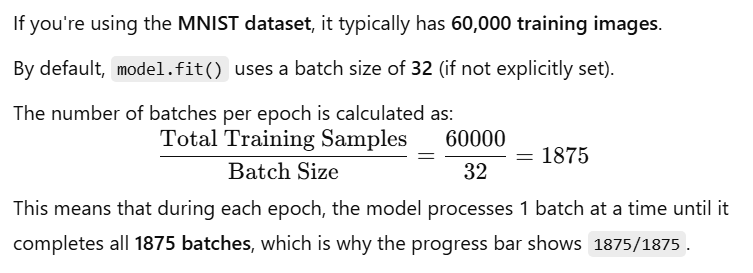

In [7]:
# Adding number of parameters (Model 2)
optimizer_2 = Adam(learning_rate = 0.001)

model_2 = Sequential(
    [layers.Input((28, 28)),
     layers.Lambda(lambda x: x / 255),
     layers.Flatten(),
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')
    ]
)

model_2.compile(optimizer=optimizer_2,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8339 - loss: 0.5893 - val_accuracy: 0.9358 - val_loss: 0.2266
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9387 - loss: 0.2132 - val_accuracy: 0.9505 - val_loss: 0.1686
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9552 - loss: 0.1557 - val_accuracy: 0.9561 - val_loss: 0.1499
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9618 - loss: 0.1326 - val_accuracy: 0.9625 - val_loss: 0.1318
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9678 - loss: 0.1114 - val_accuracy: 0.9651 - val_loss: 0.1218
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.0984 - val_accuracy: 0.9667 - val_loss: 0.1160
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0871 - val_accuracy: 0.9679 - val_loss: 0.1099
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0829 -

In [8]:
# Increasing/Decreasing the learning rate (Model 3)

# optimizer_3 = Adam(learning_rate = 0.1)
optimizer_3 = Adam(learning_rate = 0.00001)

model_3 = Sequential(
    [layers.Input((28, 28)),
     layers.Lambda(lambda x: x / 255),
     layers.Flatten(),
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')
    ]
)

model_3.compile(optimizer=optimizer_3,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_3.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1931 - loss: 2.1581 - val_accuracy: 0.5856 - val_loss: 1.7161
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6373 - loss: 1.6010 - val_accuracy: 0.7642 - val_loss: 1.2353
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7691 - loss: 1.1727 - val_accuracy: 0.8212 - val_loss: 0.9300
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8183 - loss: 0.9033 - val_accuracy: 0.8499 - val_loss: 0.7459
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8446 - loss: 0.7388 - val_accuracy: 0.8665 - val_loss: 0.6324
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8561 - loss: 0.6383 - val_accuracy: 0.8749 - val_loss: 0.5582
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8650 - loss: 0.5679 - val_accuracy: 0.8803 - val_loss: 0.5065
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8755 - loss: 0.5147

In [9]:
# Greatly adding number of parameters (Model 4)
optimizer_4 = Adam(learning_rate = 0.001)

model_4 = Sequential(
    [layers.Input((28, 28)),
     layers.Lambda(lambda x: x / 255),
     layers.Flatten(),
     layers.Dense(128, activation='relu'),
     layers.Dense(128, activation='relu'),
     layers.Dense(10, activation='softmax')
    ]
)

model_4.compile(optimizer=optimizer_4,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_4.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8887 - loss: 0.3953 - val_accuracy: 0.9603 - val_loss: 0.1259
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9693 - loss: 0.0993 - val_accuracy: 0.9690 - val_loss: 0.1007
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9804 - loss: 0.0644 - val_accuracy: 0.9769 - val_loss: 0.0777
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9850 - loss: 0.0466 - val_accuracy: 0.9690 - val_loss: 0.1029
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9883 - loss: 0.0376 - val_accuracy: 0.9753 - val_loss: 0.0896
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9908 - loss: 0.0281 - val_accuracy: 0.9777 - val_loss: 0.0863
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9917 - loss: 0.0247 - val_accuracy: 0.9785 - val_loss: 0.0889
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9924 - loss: 0

Note: Model 4 almost directly memorized the training set, indicating overfitting.

In [10]:
# Add Regularization / Dropout to reduce overfitting

from tensorflow.keras.regularizers import l2

optimizer_5 = Adam(learning_rate = 0.001)

model_5 = Sequential(
    [layers.Input((28, 28)),
     layers.Lambda(lambda x: x / 255),
     layers.Flatten(),
     layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
     layers.Dropout(0.05),
     layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
     layers.Dropout(0.05),
     layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
     layers.Dropout(0.05),
     layers.Dense(10, activation='softmax')
    ]
)

model_5.compile(optimizer=optimizer_5,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_5.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8673 - loss: 0.7474 - val_accuracy: 0.9577 - val_loss: 0.3202
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9576 - loss: 0.3152 - val_accuracy: 0.9635 - val_loss: 0.2584
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9617 - loss: 0.2619 - val_accuracy: 0.9684 - val_loss: 0.2314
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9649 - loss: 0.2419 - val_accuracy: 0.9676 - val_loss: 0.2244
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9657 - loss: 0.2321 - val_accuracy: 0.9652 - val_loss: 0.2266
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9679 - loss: 0.2176 - val_accuracy: 0.9732 - val_loss: 0.2023
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9682 - loss: 0.2136 - val_accuracy: 0.9749 - val_loss: 0.1934
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9691 - loss: 0

In [11]:
# Increase the numbr of epochs
model_5.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9681 - loss: 0.2051 - val_accuracy: 0.9744 - val_loss: 0.1897
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9716 - loss: 0.1939 - val_accuracy: 0.9681 - val_loss: 0.2012
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9689 - loss: 0.2002 - val_accuracy: 0.9707 - val_loss: 0.1943
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9701 - loss: 0.1995 - val_accuracy: 0.9745 - val_loss: 0.1855
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9718 - loss: 0.1944 - val_accuracy: 0.9701 - val_loss: 0.2016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9705 - loss: 0.1942 - val_accuracy: 0.9715 - val_loss: 0.1895
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9717 - loss: 0.1898 - val_accuracy: 0.9709 - val_loss: 0.1899
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9690 - loss: 0

In [12]:
# Evaluate each model on the test set
def evaluate_model(model, model_name):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model.name}: Test Accuracy = {accuracy:.4f}")

# Test all models
print("Evaluating Model 1:")
evaluate_model(model_1, "Model 1")

print("\nEvaluating Model 2:")
evaluate_model(model_2, "Model 2")

print("\nEvaluating Model 3:")
evaluate_model(model_3, "Model 3")

print("\nEvaluating Model 4:")
evaluate_model(model_4, "Model 4")

print("\nEvaluating Model 5:")
evaluate_model(model_5, "Model 5")

Evaluating Model 1:
sequential: Test Accuracy = 0.9258

Evaluating Model 2:
sequential_1: Test Accuracy = 0.9708

Evaluating Model 3:
sequential_2: Test Accuracy = 0.8943

Evaluating Model 4:
sequential_3: Test Accuracy = 0.9781

Evaluating Model 5:
sequential_4: Test Accuracy = 0.9717


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


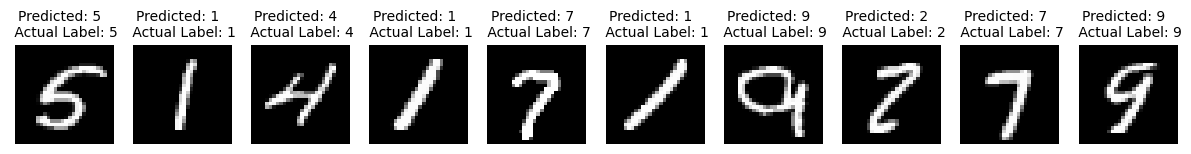

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Select 10 random indices from the test set
num_samples = 10
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

# Get 10 random test images and their actual labels
sample_images = X_test[random_indices]
actual_labels = y_test[random_indices]

# Normalize and reshape the images for the model
sample_images_norm = sample_images / 255.0  # Normalize
sample_images_norm = sample_images.reshape(-1, 28, 28)  # Ensure correct shape

# Get predictions
predictions = model_5.predict(sample_images_norm)
predicted_labels = np.argmax(predictions, axis=1)  # Get predicted labels

# Plot the images with predictions
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i], cmap='gray')
    ax.set_title(f"Predicted: {predicted_labels[i]}  \n Actual Label: {actual_labels[i]}", fontsize=10)
    ax.axis('off')

plt.show()